In [60]:
%load_ext autoreload
%autoreload 2

import nn
from graphviz import Digraph

from visualize import visualize_neural_network

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
def dupe_neuron(id, bias):
    return nn.NeuronGene(id, bias), nn.NeuronGene(id, bias)

def dupe_synapse(n1a, n1b, n2a, n2b, id, weight, is_on):
    return nn.SynapseGene(id, n1a, n1b, weight, is_on), nn.SynapseGene(id, n2a, n2b, weight, is_on)

def make_two_nets():
    a1 = nn.NeuronGene(1, 0.3)
    a2 = nn.NeuronGene(1, 0.7)
    # a1, a2 = dupe_neuron(1, 0.5)
    b1, b2 = dupe_neuron(2, 0.5)
    c1, c2 = dupe_neuron(3, 0.5)
    d1, d2 = dupe_neuron(4, 0.5)
    e1, e2 = dupe_neuron(5, 0.5)
    f1, f2 = dupe_neuron(6, 0.5)
    ad1, ad2 = dupe_synapse(a1, d1, a2, d2, 1, 0.5, True)
    bd1, bd2 = dupe_synapse(b1, d1, b2, d2, 2, 0.5, True)
    cd1, cd2 = dupe_synapse(c1, d1, c2, d2, 3, 0.5, False)
    ce1, ce2 = dupe_synapse(c1, e1, c2, e2, 4, 0.5, True)
    df1, df2 = dupe_synapse(d1, f1, d2, f2, 5, 0.5, True)
    ef1, ef2 = dupe_synapse(e1, f1, e2, f2, 6, 0.5, True)
    genome1 = nn.NetworkGenome([a1, b1, c1], [f1], [d1, e1], [ad1, bd1, cd1, ce1, df1, ef1])
    genome2 = nn.NetworkGenome([a2, b2, c2], [f2], [d2, e2], [ad2, bd2, cd2, ce2, df2, ef2])
    net1 = nn.Network(genome1)
    net2 = nn.Network(genome2)
    return net1, net2

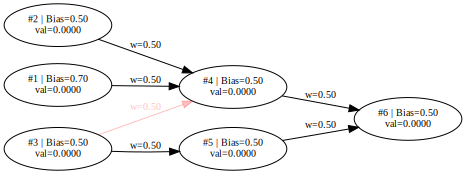

In [162]:
net1, net2 = make_two_nets()
child = nn.NetworkGenome.from_crossover(net2, net1)
child_net = nn.Network(child)
visualize_neural_network(child_net, True)

In [85]:
hex(id(child_net.neurons[0]))

'0x10832b8c0'

In [87]:
hex(id(net1.neurons[0])), hex(id(net2.neurons[0]))

('0x10824a3c0', '0x10824a7b0')

Neural Network with 6 neurons, 6 synapses